# Black scholes model

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
N = norm.cdf

def comp_d1(S, K, T, r, sigma):
    return (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))

def comp_d2(sigma, T, d1):
    return d1 - sigma * np.sqrt(T)

def BS_CALL(S, K, T, r, sigma):
    d1 = comp_d1(S, K, T, r, sigma)
    d2 = comp_d2(sigma, T, d1)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = comp_d1(S, K, T, r, sigma)
    d2 = comp_d2(sigma, T, d1)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

In [ ]:
BS_CALL(100, 100, 1, 0.01, 1)

38.60124377131831

In [ ]:
BS_PUT(100, 100, 1, 0.01, 1)

37.60622714623511

## S Effect on Option Value

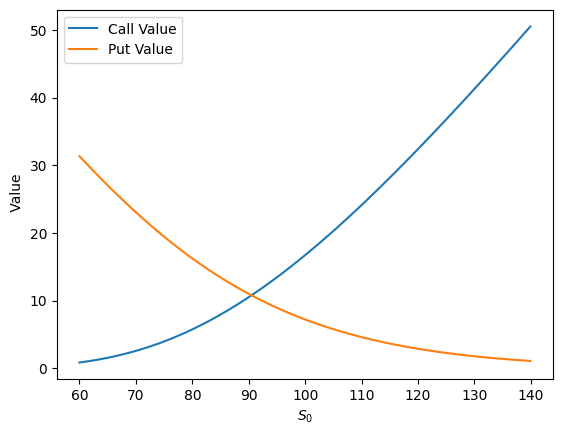

In [ ]:
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

## σ Effect on Black-Scholes Value

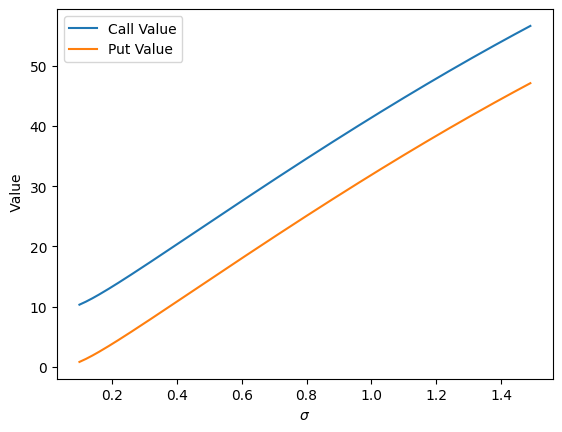

In [ ]:
K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

## Effect of Time on Black-Scholes Price

<ipython-input-3-ee0a3d5139de>:4: RuntimeWarning: invalid value encountered in scalar divide
  return (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


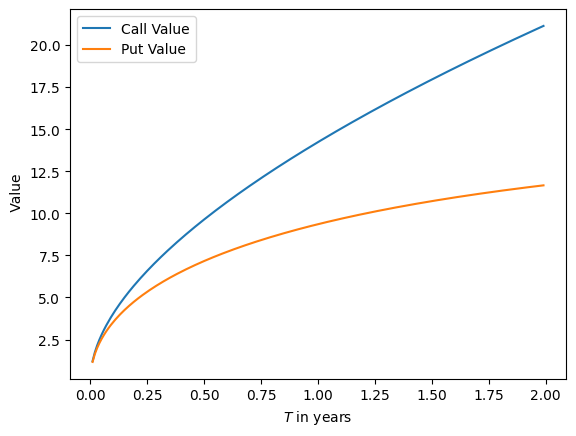

In [ ]:
K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()

## Main Problem with Black Scholes

Text(0.5, 1.0, 'AAPL Rolling Volatility')

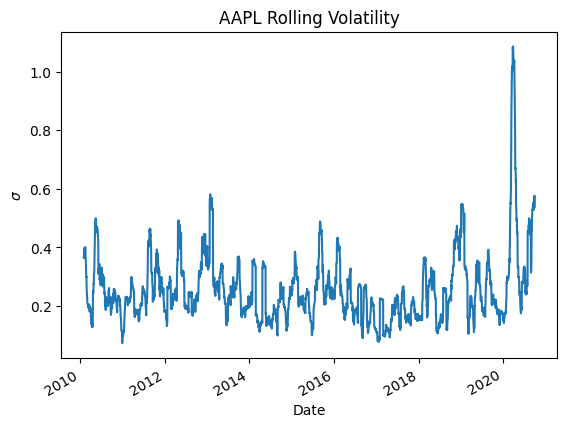

In [ ]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


start = dt.datetime(2010,1,1)
end =dt.datetime(2020,10,1)
symbol = 'AAPL' ###using Apple as an example
data = yf.download(symbol, start, end, progress=False)
data['change'] = data['Adj Close'].pct_change()
data['rolling_sigma'] = data['change'].rolling(20).std() * np.sqrt(255)

data.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('AAPL Rolling Volatility')

## Cos $t_0$

38.60119220944964
-2.4194074629184805
38.600692868766856


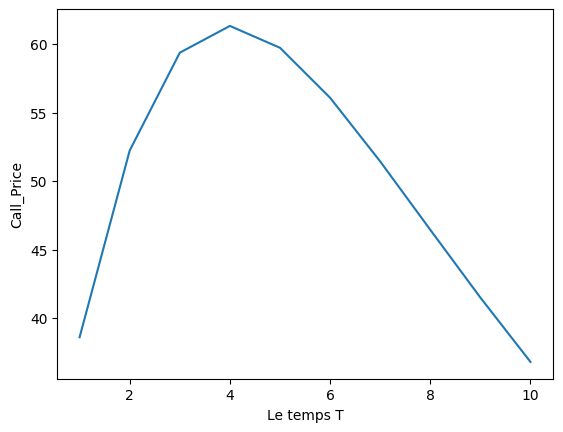

In [ ]:
from math import pi, cos, exp, sin, log
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

# Function X
def X(k, c, d, a, b):
    part1 = 1 / (1 + ((k * pi) / (b - a))**2)
    A = k * pi * ((d - a) / (b - a))
    B = k * pi * ((c - a) / (b - a))
    part2 = (cos(A) * exp(d) - cos(B) * exp(c)
             + ((k * pi) / (b - a)) * sin(A) * exp(d)
             - ((k * pi) / (b - a)) * sin(B) * exp(c))
    return part1 * part2

# Function fi
def fi(k, c, d, a, b):
    if k == 0:
        return d - c
    A = k * pi * ((d - a) / (b - a))
    B = k * pi * ((c - a) / (b - a))
    return (sin(A) - sin(B)) * ((b - a) / (k * pi))

# Function Vcall
def Vcall(k, i, a, b):
    a1 = a - log(k)
    b1 = b - log(k)
    return (2 / (b1 - a1)) * k * (X(i, 0, b1, a, b) - fi(i, 0, b1, a, b))

# Function Phi
def Phi(sigma, S0, r, t, omega):
    return np.exp(1j * omega * (np.log(S0) + (r - (sigma**2)/2) * t) - ((sigma**2 * t)/2 * omega**2))

# Function Prix
def Prix(r, t, n, a, b, k):
    sigma = 1
    S0 = 1
    S = (1 / 2) * Phi(sigma, S0, r, t, 0).real * Vcall(k, 0, a, b)
    for i in range(1, n):
        S += (Phi(sigma, S0, r, t, i * np.pi / (b - a)) * np.exp(-1j * i * a * np.pi / (b - a))).real * Vcall(k, i, a, b)
    return np.exp(-r * t) * S

# Calculate Prix
print(Prix(0.01, 1, 10000, -100, 10, 100))

print(Vcall(1, 1, 0, 2))
S0 = 1
sigma = 1
t = 1
r = 0.01
c1 = np.log(S0) + (r - (sigma**2)/2) * t
c2 = sigma**2 * t
a = c1 - 10 * np.sqrt(c2)
b = c1 + 10 * np.sqrt(c2)

print(Prix(0.01, 1, 100, a, b, 100))


plt.figure()
plt.plot(range(1,11), [Prix(0.01, i, 100, a, b, 100) for i in range(1, 11)])
plt.xlabel("Le temps T")
plt.ylabel('Call_Price')
plt.show()

#Heston 0

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm


def coth(x):
    return  np.cosh(x) / np.sinh(x)


def heston_characteristic_function(S, K, T, r, kappa, theta, sigma, rho, V, alpha):
    # Define some characteristic functions for the Heston model
    b = lambda nu: kappa - 1j * rho * sigma * nu
    gamma = lambda nu: np.sqrt(sigma**2 * (nu**2 + 1j * nu) + b(nu)**2)
    a = lambda nu: (b(nu) / gamma(nu)) * np.sinh(T * 0.5 * gamma(nu))
    c = lambda nu: gamma(nu) * coth(0.5 * T * gamma(nu)) + b(nu)
    d = lambda nu: kappa * theta * T * b(nu) / sigma**2

    f = lambda nu: 1j * (np.log(S) + r * T) * nu + d(nu)
    g = lambda nu: (np.cosh(T * 0.5 * gamma(nu)) + a(nu)) ** (2 * kappa * theta / sigma**2)
    h = lambda nu: -(nu**2 + 1j * nu) * V / c(nu)

    phi = lambda nu: np.exp(f(nu)) * np.exp(h(nu)) / g(nu)
    return phi


def call_price(S, K, T, r, kappa, theta, sigma, rho, V, alpha, L):
    # Get the characteristic functions
    phi = heston_characteristic_function(S, K, T, r, kappa, theta, sigma, rho, V, alpha)

    # Integrands
    integrand = lambda nu: np.real(
        phi(nu - 1j * (alpha + 1))
        / (alpha**2 + alpha - nu**2 + 1j * (2 * alpha + 1) * nu)
        * np.exp(-1j * np.log(K) * nu)
    )

    # Pricing formulas
    P = (np.exp(-r * T - alpha * np.log(K)) / np.pi) * quad(integrand, 0, L)[0]

    return P
    call_price()

# Heston

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def X_k(a,b,k):
    A = 1 /(1+(k*np.pi/(b - a))**2)
    B = k*np.pi * (a / (b-a) )
    pi= math.pi
    resultat = A * ( np.cos(k*pi)*np.exp(b) - np.cos(B) + (k*pi/(b-a)) * np.sin(B))
    return resultat
def Y_k(a,b,k):
    B = k*np.pi * (a / (b-a) )
    pi= math.pi
    if(k==0):
        resultat = b
    else :
        resultat = np.sin(B) * ((b-a) / (k*pi))
    return resultat
def Ukk(a,b,k):
    resultat = (2/(b-a))*(X_k(a,b,k) - Y_k(a,b,k))
    return resultat

In [ ]:
def coefficient_c1_heston(mu,T,lamda,u_bar,u0):
    c1= (mu*T) + (1-np.exp(-lamda*T))*((u_bar-u0)/2*lamda)-0.5*u_bar*T
    return (c1)
def coefficient_c2_heston(nu,T,lamda,u0,u_bar,rho):
    c2=((1/(8*lamda**3))*(nu*T*lamda*np.exp(-lamda*T)*(u0-u_bar)*(8*lamda*rho-4*nu)))+(lamda*rho*nu*(1-np.exp(-lamda*T))*(16*u_bar-8*u0))+(2*u_bar*lamda*T*(-4*lamda*rho*nu+nu**2+4*lamda**2))+(nu**2 *((u_bar-2*u0)*np.exp(-2*lamda*T)+u_bar*(6*np.exp(-lamda*T)-7)+2*u0))+(8*lamda**2 *(u0-u_bar)*(1-np.exp(-lamda*T)))
    return (c2)

In [ ]:
def calcul_a_heston(mu,nu,T,lamda,u0,u_bar,rho):
    c1=coefficient_c1_heston(mu,T,lamda,u_bar,u0)
    c2=coefficient_c2_heston(nu,T,lamda,u0,u_bar,rho)
    a= c1- 12* np.sqrt(abs(c2))
    return (a)
def calcul_b_heston(mu,nu,T,lamda,u0,u_bar,rho):
    c1=coefficient_c1_heston(mu,T,lamda,u_bar,u0)
    c2=coefficient_c2_heston(nu,T,lamda,u0,u_bar,rho)
    b= c1 + 12* np.sqrt(abs(c2))
    return (b)

In [ ]:
def phi(a, b, k, mu, nu, lamda, rho, u_bar, u0, T, t0):
    i= complex(0,1)
    delta_t= T-t0
    pi=math.pi
    w= (k* pi) /(b-a)
    D=np.sqrt(((lamda- i*rho*nu*w)**2) + (w**2+ i*w)*(nu**2))
    G=(lamda-(i*rho*nu*w)-D)/(lamda-(i*rho*nu*w)+D)
    N= 1-G*np.exp(-D*delta_t)
    M=-i*rho*nu*w-D
    A=np.exp(i*w*mu*delta_t+(u0/(nu**2))*((1-np.exp(-D*delta_t))/N)*(lamda+M))
    B= np.exp(((lamda*u_bar)/(nu**2))*((delta_t*(lamda+M))-2*np.log(N/(1-G))))
    phi = A * B
    return(phi)

In [ ]:
def Call_Price_Heston(x,K,r, N, mu, nu, lamda, rho, u_bar, u0, T, t0):
    a = -5
    b = 5
    delta_t= T-t0
    pi=math.pi
    i= complex(0,1)
    phi_k = phi(a, b, 0, mu, nu, lamda, rho, u_bar, u0, T, t0)
    Uk=Ukk(a,b,0)
    Z = (1/2) * phi_k * Uk
    for k in range (1,N):
        phi_k = phi(a, b, k, mu, nu, lamda, rho, u_bar, u0, T, t0)
        Uk=Ukk(a,b,k)
        Z=Z+  phi_k * Uk * np.exp(i*k*pi*(x-a)/(b-a))
    v= K*np.exp(-r*delta_t)*Z.real
    return(v)

In [ ]:
Call_Price_Heston(0,100,0, 10000, 0, 0.5751, 1.5768, -0.5711, 0.0398, 0.0175, 1, 0)

10.41327978187979

In [ ]:
Call_Price_Heston(0,100,0, 10000, 0, 0.5751, 1.5768, -0.5711, 0.0398, 0.0175, 10, 0)

22.318948268564085

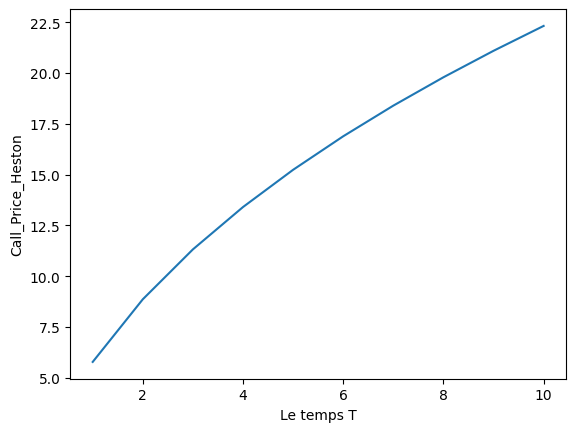

In [ ]:
plt.figure()
plt.plot(range(1,11), [Call_Price_Heston(0,100,0, 10000, 0, 0.5751, 1.5768, -0.5711, 0.0398, 0.0175, i, 0) for i in range(1, 11)])
plt.xlabel("Le temps T")
plt.ylabel('Call_Price_Heston')
plt.show()

In [ ]:
def Call_Price_Heston2(x,K,r, N, mu, nu, lamda, rho, u_bar, u0, T, t0):
    c1 = calcul_a_heston(mu,nu,T,lamda,u0,u_bar,rho)
    c2 = calcul_b_heston(mu,nu,T,lamda,u0,u_bar,rho)
    a = c1 - 12 * np.sqrt(np.abs(c2))
    b = c1 + 12 * np.sqrt(np.abs(c2))
    delta_t= T-t0
    pi=math.pi
    i= complex(0,1)
    phi_k = phi(a, b, 0, mu, nu, lamda, rho, u_bar, u0, T, t0)
    Uk=Ukk(a,b,0)
    Z = (1/2) * phi_k * Uk
    for k in range (1,N):
        phi_k = phi(a, b, k, mu, nu, lamda, rho, u_bar, u0, T, t0)
        Uk=Ukk(a,b,k)
        Z=Z+  phi_k * Uk * np.exp(i*k*pi*(x-a)/(b-a))
    v= K*np.exp(-r*delta_t)*Z.real
    return(v)

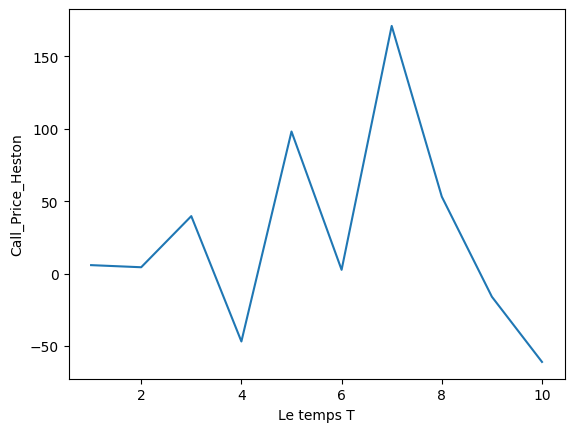

In [ ]:
plt.figure()
plt.plot(range(1,11), [Call_Price_Heston2(0,100,0, 10000, 0, 0.5751, 1.5768, -0.5711, 0.0398, 0.0175, i, 0) for i in range(1, 11)])
plt.xlabel("Le temps T")
plt.ylabel('Call_Price_Heston')
plt.show()